# Analyzing the impact of network parameters in the link PLC1-PLC2 in the Minitown topology

This notebook presents the results of multiple simulations of Minitown with different network parameters in the network link between PLC1 and PLC2. Minitown was chosen because it is a topology that is simulated fast and is a scaled down version of C-Town. The real objective is to preliminarily evaluate the impact of these network parameters into C-Town. The parameters analyzed are: Bandwidth, delay, and packet ratio loss.

In [34]:
import matplotlib.pyplot as plt
import wntr
import wntr.network.controls as controls
import sqlite3
import csv
import time
import pandas as pd
from datetime import datetime

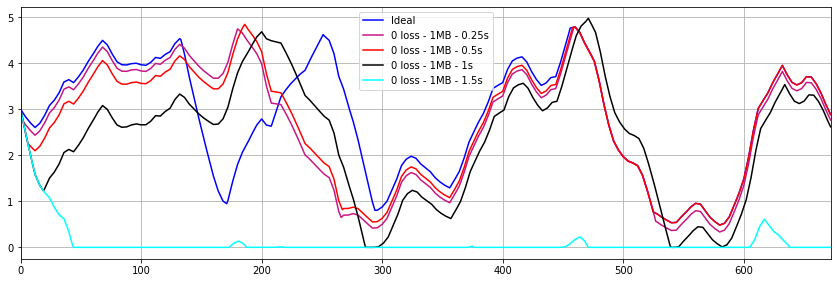

In [43]:
fig, ax_pdd = plt.subplots()
output_loss0_1mb_0_25s = pd.read_csv('../ICS_topologies/general_topology/output_loss0_1mb_0_25s/physical_process.csv')
output_loss0_1mb_0_5s = pd.read_csv('../ICS_topologies/general_topology/output_loss0_1mb_0_5s/physical_process.csv')
output_loss0_1mb_1s = pd.read_csv('../ICS_topologies/general_topology/output_loss0_1mb_1s/physical_process.csv')
output_loss0_1mb_1_5s = pd.read_csv('../ICS_topologies/general_topology/output_loss0_1mb_1_5s/physical_process.csv')
output_loss0_1mb_2s = pd.read_csv('../ICS_topologies/general_topology/output_loss0_1mb_2s/physical_process.csv')
no_loss = pd.read_csv('../ICS_topologies/general_topology/output_loss_0_1mb_0s/physical_process.csv')
no_loss['TANK_LEVEL'].plot(label='Ideal', ax=ax_pdd, color="blue" )
output_loss0_1mb_0_25s['TANK_LEVEL'].plot(label='0 loss - 1MB - 0.25s', ax=ax_pdd, color="mediumvioletred" )
output_loss0_1mb_0_5s['TANK_LEVEL'].plot(label='0 loss - 1MB - 0.5s', ax=ax_pdd, color="red" )
output_loss0_1mb_1s['TANK_LEVEL'].plot(label='0 loss - 1MB - 1s', ax=ax_pdd, color="black" )
output_loss0_1mb_1_5s['TANK_LEVEL'].plot(label='0 loss - 1MB - 1.5s', ax=ax_pdd, color="cyan" )
#output_loss_0_1mb_2s['TANK_LEVEL'].plot(label='0 loss - 1MB - 2s', ax=ax_pdd, color="red" )

leg = ax_pdd.legend()
plt.subplots_adjust(top=1.00, right=2.00)
plt.grid(True)
plt.show()

With this set of tests I want to evaluate the impact of delays in the network link. The remaining parameters were kept at good values: 0% packet loss, 1 MB in the link. The plot shows that for a delay of 1.5 the system behaves as if the PLC were not controlling the plant. This is because this delays is applied to all the messages and this completely disrupts the communication between the PLCs. For delays below 1 second, the plot shows that the plant behaves in a similar matter to a network without delay. For a delay of 1 second, the plot shows that the time response of the system has a delay when compared to the plant without delays. 

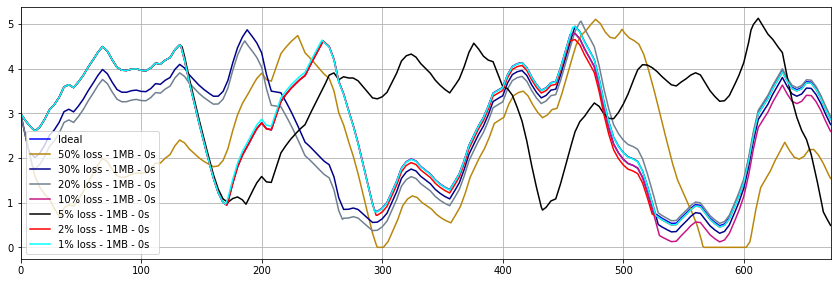

In [41]:
fig, ax_pdd = plt.subplots()
output_loss0001_1mb_0_s = pd.read_csv('../ICS_topologies/general_topology/output_loss0001_1mb_0_s/physical_process.csv')
output_loss001_1mb_0_s = pd.read_csv('../ICS_topologies/general_topology/output_loss001_1mb_0_s/physical_process.csv')
output_loss002_1mb_0_s = pd.read_csv('../ICS_topologies/general_topology/output_loss002_1mb_0_s/physical_process.csv')
output_loss005_1mb_0_s = pd.read_csv('../ICS_topologies/general_topology/output_loss005_1mb_0_s/physical_process.csv')
output_loss01_1mb_0_s = pd.read_csv('../ICS_topologies/general_topology/output_loss01_1mb_0_s/physical_process.csv')
output_loss02_1mb_0_s = pd.read_csv('../ICS_topologies/general_topology/output_loss02_1mb_0s/physical_process.csv')
output_loss03_1mb_0_s = pd.read_csv('../ICS_topologies/general_topology/output_loss03_1mb_0s/physical_process.csv')
output_loss05_1mb_0_s = pd.read_csv('../ICS_topologies/general_topology/output_loss05_1mb_0s/physical_process.csv')

no_loss = pd.read_csv('../ICS_topologies/general_topology/output_loss_0_1mb_0s/physical_process.csv')
no_loss['TANK_LEVEL'].plot(label='Ideal', ax=ax_pdd, color="blue" )

output_loss05_1mb_0_s['TANK_LEVEL'].plot(label='50% loss - 1MB - 0s', ax=ax_pdd, color="darkgoldenrod" )
output_loss03_1mb_0_s['TANK_LEVEL'].plot(label='30% loss - 1MB - 0s', ax=ax_pdd, color="darkblue" )
output_loss02_1mb_0_s['TANK_LEVEL'].plot(label='20% loss - 1MB - 0s', ax=ax_pdd, color="slategray" )
output_loss01_1mb_0_s['TANK_LEVEL'].plot(label='10% loss - 1MB - 0s', ax=ax_pdd, color="mediumvioletred" )
output_loss005_1mb_0_s['TANK_LEVEL'].plot(label='5% loss - 1MB - 0s', ax=ax_pdd, color="black" )
output_loss002_1mb_0_s['TANK_LEVEL'].plot(label='2% loss - 1MB - 0s', ax=ax_pdd, color="red" )
output_loss001_1mb_0_s['TANK_LEVEL'].plot(label='1% loss - 1MB - 0s', ax=ax_pdd, color="cyan" )
#output_loss0001_1mb_0_s['TANK_LEVEL'].plot(label='0.1% loss - 1MB - 0s', ax=ax_pdd, color="darkgoldenrod" )


leg = ax_pdd.legend()
plt.subplots_adjust(top=1.00, right=2.00)
plt.grid(True)
plt.show()

This set of tests analyzes the impact of the percentage of packets lost in the network. For delay values up to 5% the system behaves pretty close to the ideal conditions. It is important to mention that a 5% packet error ratio is a very high value and greater values are not considered normal network conditions, but a network in a faulty state. Nevertheless, higher packet loss ratio values were simulated to analyze the impact into the system 

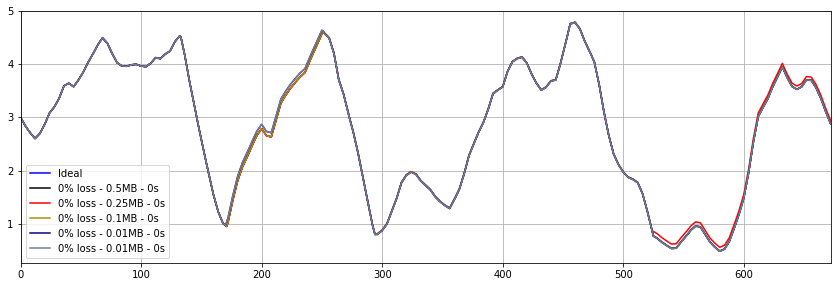

In [12]:
fig, ax_pdd = plt.subplots()
output_loss0_0001mb_0s = pd.read_csv('../ICS_topologies/general_topology/output_loss0_001mb_0s/physical_process.csv')
output_loss0_001mb_0s = pd.read_csv('../ICS_topologies/general_topology/output_loss0_001mb_0s/physical_process.csv')
output_loss0_01mb_0s = pd.read_csv('../ICS_topologies/general_topology/output_loss0_01mb_0s/physical_process.csv')
output_loss0_025mb_0s = pd.read_csv('../ICS_topologies/general_topology/output_loss0_025mb_0s/physical_process.csv')
output_loss0_05mb_0s = pd.read_csv('../ICS_topologies/general_topology/output_loss0_05mb_0s/physical_process.csv')
no_loss = pd.read_csv('../ICS_topologies/general_topology/output_loss_0_1mb_0s/physical_process.csv')
no_loss['TANK_LEVEL'].plot(label='Ideal', ax=ax_pdd, color="blue" )
output_loss0_05mb_0s['TANK_LEVEL'].plot(label='0% loss - 0.5MB - 0s', ax=ax_pdd, color="black" )
output_loss0_025mb_0s['TANK_LEVEL'].plot(label='0% loss - 0.25MB - 0s', ax=ax_pdd, color="red" )
output_loss0_01mb_0s['TANK_LEVEL'].plot(label='0% loss - 0.1MB - 0s', ax=ax_pdd, color="darkgoldenrod" )
output_loss0_001mb_0s['TANK_LEVEL'].plot(label='0% loss - 0.01MB - 0s', ax=ax_pdd, color="darkblue" )
output_loss0_0001mb_0s['TANK_LEVEL'].plot(label='0% loss - 0.01MB - 0s', ax=ax_pdd, color="slategray" )


leg = ax_pdd.legend()
plt.subplots_adjust(top=1.00, right=2.00)
plt.grid(True)
plt.show()

This set of tests show that the impact of reducing the badnwidth is not noticeable. This is due to the fact the this network generates a very low traffic load. For the following tests, the bandwidth network parameter will be ignored and left at the ideal conditions value

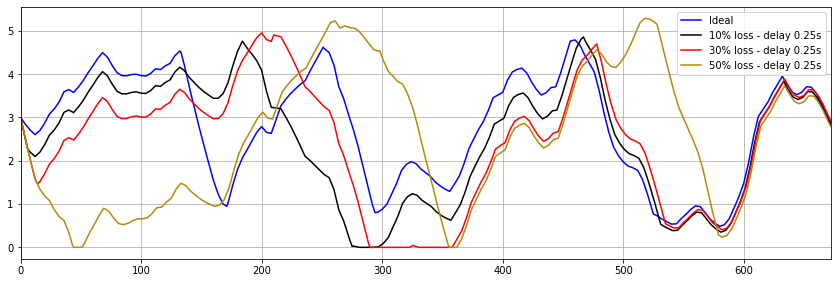

In [29]:
fig, ax_pdd = plt.subplots()
output_loss_01_delay_025s = pd.read_csv('../ICS_topologies/general_topology/output_loss_01_delay_025s/physical_process.csv')
output_loss_03_delay_025s = pd.read_csv('../ICS_topologies/general_topology/output_loss_03_delay_025s/physical_process.csv')
output_loss_05_delay_025s = pd.read_csv('../ICS_topologies/general_topology/output_loss_05_delay_025s/physical_process.csv')



no_loss = pd.read_csv('../ICS_topologies/general_topology/output_loss_0_1mb_0s/physical_process.csv')

no_loss['TANK_LEVEL'].plot(label='Ideal', ax=ax_pdd, color="blue" )
output_loss_01_delay_025s['TANK_LEVEL'].plot(label='10% loss - delay 0.25s', ax=ax_pdd, color="black" )
output_loss_03_delay_025s['TANK_LEVEL'].plot(label='30% loss - delay 0.25s', ax=ax_pdd, color="red" )
output_loss_05_delay_025s['TANK_LEVEL'].plot(label='50% loss - delay 0.25s', ax=ax_pdd, color="darkgoldenrod" )

#output_loss_0_1mb_05s['TANK_LEVEL'].plot(label='10% loss - 0.01MB - 0.5s', ax=ax_pdd, color="black" )
#output_loss0_001mb_0s['TANK_LEVEL'].plot(label='0% loss - 0.01MB - 0s', ax=ax_pdd, color="darkblue" )
#output_loss0_0001mb_0s['TANK_LEVEL'].plot(label='0% loss - 0.01MB - 0s', ax=ax_pdd, color="slategray" )


leg = ax_pdd.legend()
plt.subplots_adjust(top=1.00, right=2.00)
plt.grid(True)
plt.show()

This set of tests analyzes the combination of the packet loss ratio and delays. As expected, the combination of these parameters produces a less favorable behavior for the plant

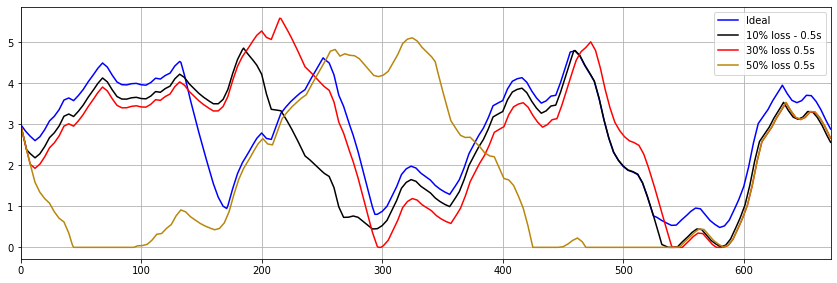

In [32]:
fig, ax_pdd = plt.subplots()
output_loss_01_delay_05s = pd.read_csv('../ICS_topologies/general_topology/output_loss_01_delay_05s/physical_process.csv')
output_loss_03_delay_05s = pd.read_csv('../ICS_topologies/general_topology/output_loss_03_delay_05s/physical_process.csv')
output_loss_05_delay_05s = pd.read_csv('../ICS_topologies/general_topology/output_loss_05_delay_05s/physical_process.csv')


no_loss = pd.read_csv('../ICS_topologies/general_topology/output_loss_0_1mb_0s/physical_process.csv')
no_loss['TANK_LEVEL'].plot(label='Ideal', ax=ax_pdd, color="blue" )

output_loss_01_delay_05s['TANK_LEVEL'].plot(label='10% loss - 0.5s', ax=ax_pdd, color="black" )
output_loss_03_delay_05s['TANK_LEVEL'].plot(label='30% loss 0.5s', ax=ax_pdd, color="red" )
output_loss_05_delay_05s['TANK_LEVEL'].plot(label='50% loss 0.5s', ax=ax_pdd, color="darkgoldenrod" )

leg = ax_pdd.legend()
plt.subplots_adjust(top=1.00, right=2.00)
plt.grid(True)
plt.show()


Comparing with the previous set of tests, we can infer that the system behaves in a similar way when the delay is 0.25s and 0.5 seconds. In both cases, what worsens the plant behavior is the increase in the packet loss ratio

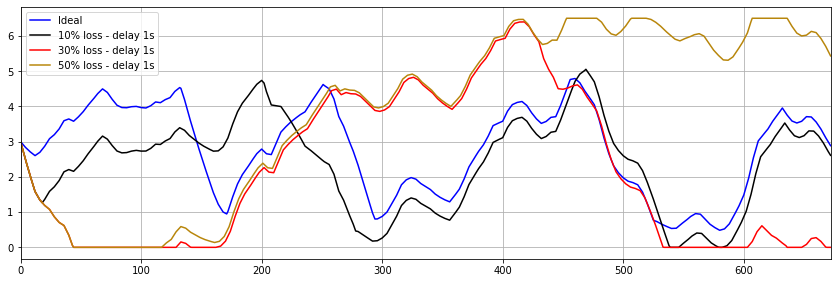

In [31]:
fig, ax_pdd = plt.subplots()
output_loss_01_delay_1s = pd.read_csv('../ICS_topologies/general_topology/output_loss_01_delay_1s/physical_process.csv')
output_loss_03_delay_1s = pd.read_csv('../ICS_topologies/general_topology/output_loss_03_delay_1s/physical_process.csv')
output_loss_05_delay_1s = pd.read_csv('../ICS_topologies/general_topology/output_loss_05_delay_1s/physical_process.csv')


no_loss = pd.read_csv('../ICS_topologies/general_topology/output_loss_0_1mb_0s/physical_process.csv')
no_loss['TANK_LEVEL'].plot(label='Ideal', ax=ax_pdd, color="blue" )

output_loss_01_delay_1s['TANK_LEVEL'].plot(label='10% loss - delay 1s', ax=ax_pdd, color="black" )
output_loss_03_delay_1s['TANK_LEVEL'].plot(label='30% loss - delay 1s', ax=ax_pdd, color="red" )
output_loss_05_delay_1s['TANK_LEVEL'].plot(label='50% loss - delay 1s', ax=ax_pdd, color="darkgoldenrod" )

leg = ax_pdd.legend()
plt.subplots_adjust(top=1.00, right=2.00)
plt.grid(True)
plt.show()

A delay of 1seconds produces the worst behavior when combined with packet loss ratio

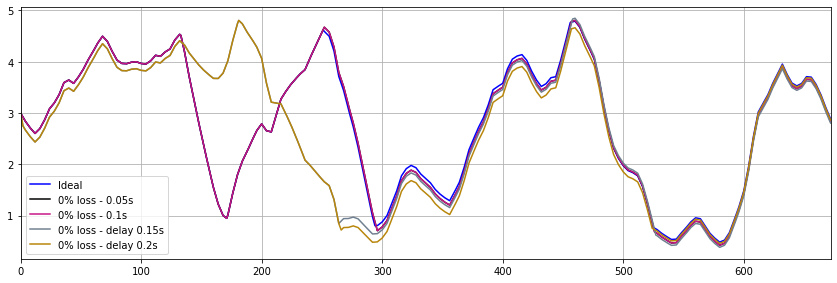

In [58]:
fig, ax_pdd = plt.subplots()

output_loss0_delay005s = pd.read_csv('../ICS_topologies/general_topology/second_batch/output_loss0_delay01s/physical_process.csv')
output_loss0_delay01s = pd.read_csv('../ICS_topologies/general_topology/second_batch/output_loss0_delay01s/physical_process.csv')
output_loss0_delay015s = pd.read_csv('../ICS_topologies/general_topology/second_batch/output_loss0_delay015s/physical_process.csv')
output_loss0_delay02s = pd.read_csv('../ICS_topologies/general_topology/second_batch/output_loss0_delay02s/physical_process.csv')
no_loss = pd.read_csv('../ICS_topologies/general_topology/output_loss_0_1mb_0s/physical_process.csv')


no_loss['TANK_LEVEL'].plot(label='Ideal', ax=ax_pdd, color="blue" )
output_loss0_delay005s['TANK_LEVEL'].plot(label='0% loss - 0.05s', ax=ax_pdd, color="black" )
output_loss0_delay01s['TANK_LEVEL'].plot(label='0% loss - 0.1s', ax=ax_pdd, color="mediumvioletred" )
output_loss0_delay015s['TANK_LEVEL'].plot(label='0% loss - delay 0.15s', ax=ax_pdd, color="slategray" )
output_loss0_delay02s['TANK_LEVEL'].plot(label='0% loss - delay 0.2s', ax=ax_pdd, color="darkgoldenrod" )


leg = ax_pdd.legend()
plt.subplots_adjust(top=1.00, right=2.00)
plt.grid(True)
plt.show()

This set of test was run to verify the conditions for lower delay values. The plot shows two distinct groups with similar behaviors for member of the same group. The first group is delays of 0.2s and 0.15s. The other group is 0s, 0.05s, 0.1s with similar behaviors. From this, we could select the values of 0.05, 0.1s and 0.15s to combine with packet loss

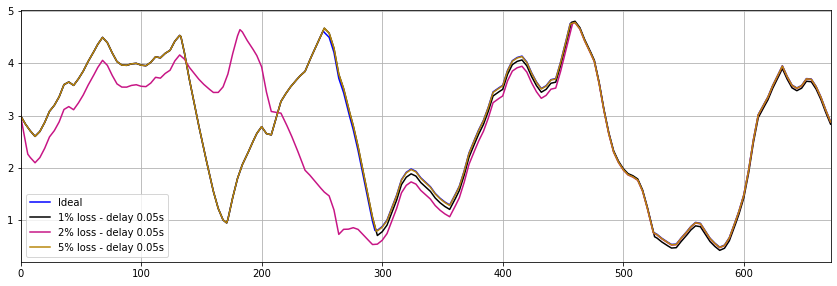

In [66]:
fig, ax_pdd = plt.subplots()

output_loss001_delay005s = pd.read_csv('../ICS_topologies/general_topology/third_batch/output_loss001_delay005s/physical_process.csv')
output_loss002_delay005s = pd.read_csv('../ICS_topologies/general_topology/third_batch/output_loss002_delay005s/physical_process.csv')
output_loss005_delay005s = pd.read_csv('../ICS_topologies/general_topology/third_batch/output_loss005_delay005s/physical_process.csv')
no_loss = pd.read_csv('../ICS_topologies/general_topology/output_loss_0_1mb_0s/physical_process.csv')

no_loss['TANK_LEVEL'].plot(label='Ideal', ax=ax_pdd, color="blue" )
output_loss0_delay005s['TANK_LEVEL'].plot(label='1% loss - delay 0.05s', ax=ax_pdd, color="black" )
output_loss002_delay005s['TANK_LEVEL'].plot(label='2% loss - delay 0.05s', ax=ax_pdd, color="mediumvioletred" )
output_loss005_delay005s['TANK_LEVEL'].plot(label='5% loss - delay 0.05s', ax=ax_pdd, color="darkgoldenrod" )
#output_loss0_delay015s['TANK_LEVEL'].plot(label='0% loss - delay 0.15s', ax=ax_pdd, color="slategray" )

leg = ax_pdd.legend()
plt.subplots_adjust(top=1.00, right=2.00)
plt.grid(True)
plt.show()

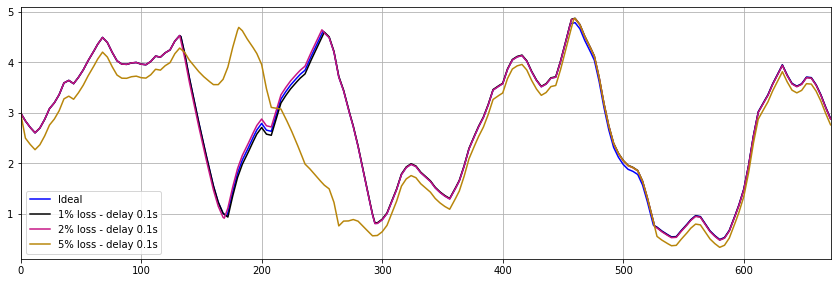

In [69]:
fig, ax_pdd = plt.subplots()

output_loss001_delay01s = pd.read_csv('../ICS_topologies/general_topology/third_batch/output_loss001_delay01s/physical_process.csv')
output_loss002_delay01s = pd.read_csv('../ICS_topologies/general_topology/third_batch/output_loss002_delay01s/physical_process.csv')
output_loss005_delay01s = pd.read_csv('../ICS_topologies/general_topology/third_batch/output_loss005_delay01s/physical_process.csv')
no_loss = pd.read_csv('../ICS_topologies/general_topology/output_loss_0_1mb_0s/physical_process.csv')


no_loss['TANK_LEVEL'].plot(label='Ideal', ax=ax_pdd, color="blue" )
output_loss001_delay01s['TANK_LEVEL'].plot(label='1% loss - delay 0.1s', ax=ax_pdd, color="black" )
output_loss002_delay01s['TANK_LEVEL'].plot(label='2% loss - delay 0.1s', ax=ax_pdd, color="mediumvioletred" )
output_loss005_delay01s['TANK_LEVEL'].plot(label='5% loss - delay 0.1s', ax=ax_pdd, color="darkgoldenrod" )


leg = ax_pdd.legend()
plt.subplots_adjust(top=1.00, right=2.00)
plt.grid(True)
plt.show()

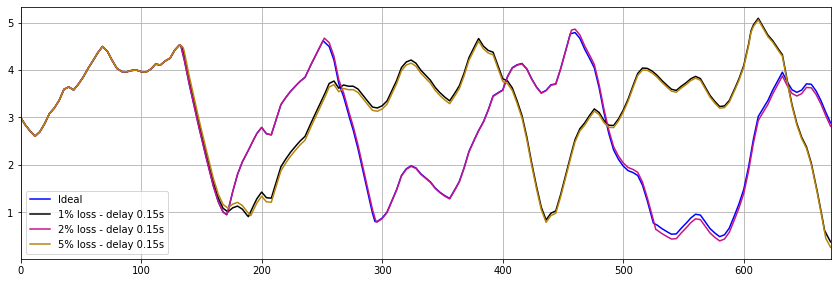

In [73]:
fig, ax_pdd = plt.subplots()

output_loss001_delay015s = pd.read_csv('../ICS_topologies/general_topology/third_batch/output_loss001_delay015s/physical_process.csv')
output_loss002_delay015s = pd.read_csv('../ICS_topologies/general_topology/third_batch/output_loss002_delay015s/physical_process.csv')
output_loss005_delay015s = pd.read_csv('../ICS_topologies/general_topology/third_batch/output_loss005_delay015s/physical_process.csv')
no_loss = pd.read_csv('../ICS_topologies/general_topology/output_loss_0_1mb_0s/physical_process.csv')


no_loss['TANK_LEVEL'].plot(label='Ideal', ax=ax_pdd, color="blue" )
output_loss001_delay015s['TANK_LEVEL'].plot(label='1% loss - delay 0.15s', ax=ax_pdd, color="black" )
output_loss002_delay015s['TANK_LEVEL'].plot(label='2% loss - delay 0.15s', ax=ax_pdd, color="mediumvioletred" )
output_loss005_delay015s['TANK_LEVEL'].plot(label='5% loss - delay 0.15s', ax=ax_pdd, color="darkgoldenrod" )


leg = ax_pdd.legend()
plt.subplots_adjust(top=1.00, right=2.00)
plt.grid(True)
plt.show()

Delay:
    Ideal: 0
    Average: 50ms
    Bad: 100ms
    Pretty bad: 150ms
        
Loss
    Ideal: 0%
    Average: 1%
    Bad: 2%
    Pretty bad: 5%
        